In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

filename = 'bank-full.csv'
dataset1 = pd.read_csv(filename, sep = ';')

#k-fold yapılmalı
#min 5 sınıflandırma, naive bayes, log reg, knn, random forest, svm, multilayer perceptron
#accuracy, recall, precision, f-score, auc eğrisi
#feature selection, min 2 adet

#problemi açıkla, önceden kullanılan yöntemleri kullan, yapılacakları yaz, çıkan sonuçları yaz

In [2]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Balance değerindeki aykırı değerler çıkarıldı
from scipy.stats import zscore

dataset1[['balance']].mean()
dataset1[['balance']].mean()

dataset1['balance_outliers'] = dataset1['balance']
dataset1['balance_outliers']= zscore(dataset1['balance_outliers'])

condition1 = (dataset1['balance_outliers']>3) | (dataset1['balance_outliers']<-3 )
dataset2 = dataset1.drop(dataset1[condition1].index, axis = 0, inplace = False)
dataset2 = dataset2.drop('balance_outliers', axis=1)

In [4]:
dataset2.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset2, new_column, old_column):
    dataset2[new_column] = dataset2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset2[new_column].value_counts()

convert(dataset2, "response_binary", "response")

0    39298
1     5168
Name: response_binary, dtype: int64

In [5]:
dataset2['duration'] = dataset2['duration'].apply(lambda n:n/60).round(2)

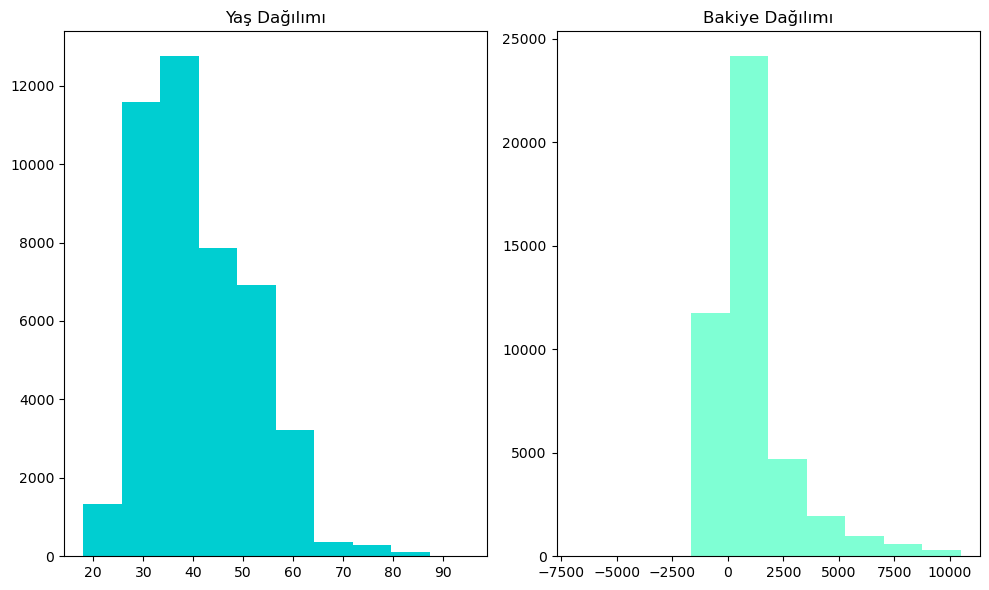

In [6]:
age_balance_dist = plt.figure(figsize = (10,6))

ra1 = age_balance_dist.add_subplot(1,2,1) 
ra2 = age_balance_dist.add_subplot(1,2,2)

ra1.hist(dataset2['age'], color = 'darkturquoise')
ra1.set_title('Yaş Dağılımı')

ra2.hist(dataset2['balance'], color = 'aquamarine')
ra2.set_title('Bakiye Dağılımı')

plt.tight_layout() 
plt.show()

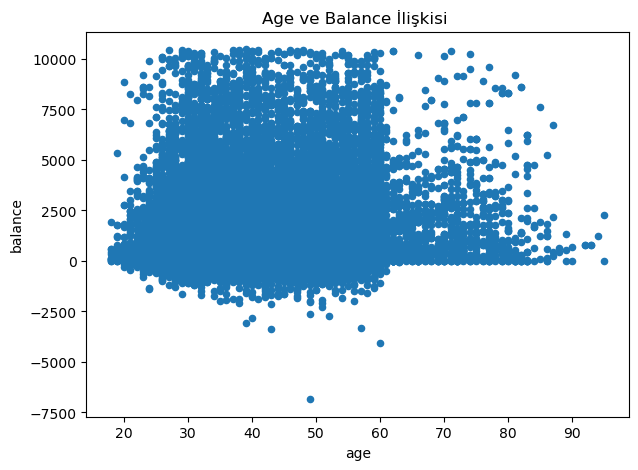

In [7]:
age_balance_rel = dataset2.plot.scatter('age','balance',figsize = (7,5))

plt.title('Age ve Balance İlişkisi ')
plt.show()

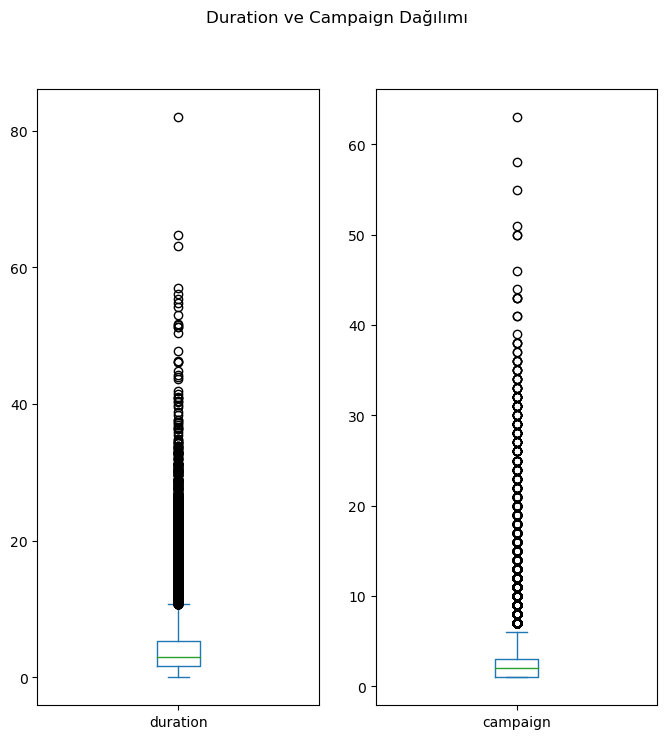

In [8]:
duration_campaign_dist = dataset2[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='Duration ve Campaign Dağılımı')
plt.show()

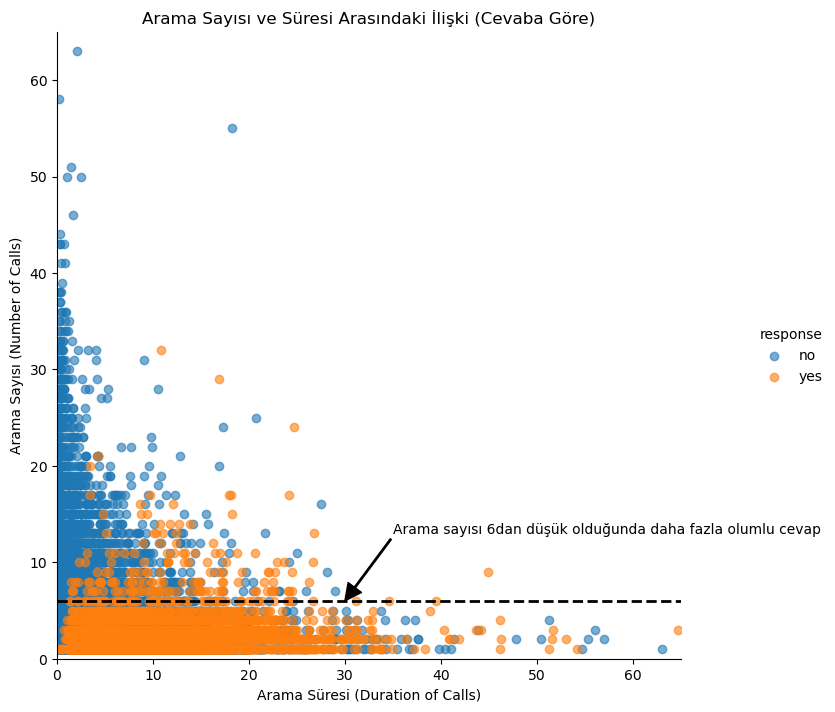

In [9]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset2,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Arama Sayısı (Number of Calls)')
plt.xlabel('Arama Süresi (Duration of Calls)')
plt.title('Arama Sayısı ve Süresi Arasındaki İlişki (Cevaba Göre)')

plt.axhline(y=6, linewidth=2, color="k", linestyle='--')
plt.annotate('Arama sayısı 6dan düşük olduğunda daha fazla olumlu cevap ',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

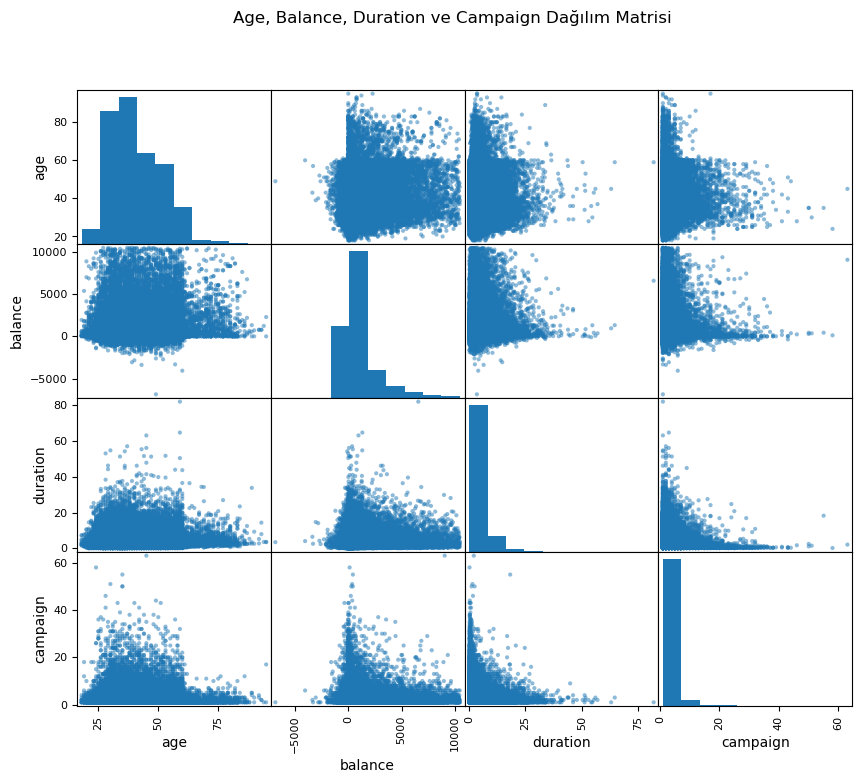

In [10]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset2[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('Age, Balance, Duration ve Campaign Dağılım Matrisi')
plt.show()

In [11]:
rel = dataset2.corr()
rel = abs(rel)
rel = rel['response_binary'].sort_values(ascending=False)
rel = rel[1:]

rel

useful_feature = rel[0:8]
useful_feature = useful_feature.index
useful_feature

Index(['duration', 'pdays', 'previous', 'balance', 'campaign', 'day', 'age'], dtype='object')

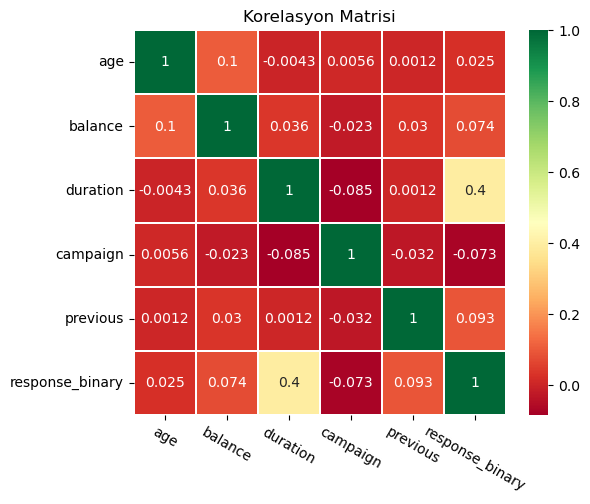

In [12]:
corr_data = dataset2[['age','balance','duration','campaign','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Korelasyon Matrisi')
plt.show()

In [13]:
dataset2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,0


In [14]:
dataset2.drop(['marital'],axis=1, inplace=True)
dataset3 = dataset2.iloc[:, 0:7]

In [15]:
dataset4 = pd.get_dummies(dataset3, columns = ['job'])
dataset4 = pd.get_dummies(dataset4, columns = ['education'])
dataset4['housing'] = dataset4['housing'].map({'yes': 1, 'no': 0})
dataset4['default'] = dataset4['default'].map({'yes': 1, 'no': 0})
dataset4['loan'] = dataset4['loan'].map({'yes': 1, 'no': 0})
dataset2_response = pd.DataFrame(dataset2['response_binary'])
dataset4 = pd.merge(dataset4, dataset2_response, left_index = True, right_index = True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report

array = dataset4.values

X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [19]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.884206 (0.006536)
KNN: 0.871949 (0.008005)
RFC: 0.869925 (0.005130)
NB: 0.817018 (0.005949)
SVM: 0.884178 (0.006580)


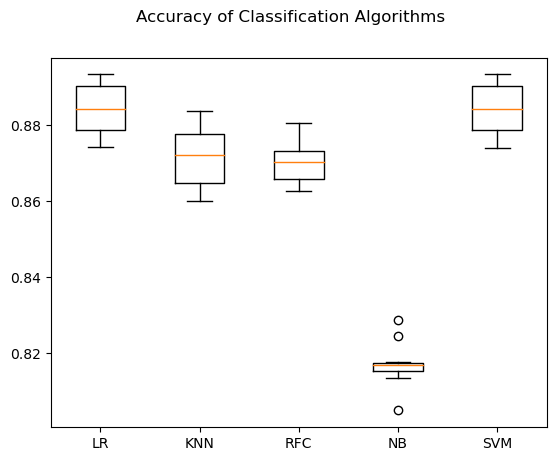

In [20]:
fig = plt.figure()
fig.suptitle('Accuracy of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

LR
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7846
           1       0.00      0.00      0.00      1048

    accuracy                           0.88      8894
   macro avg       0.44      0.50      0.47      8894
weighted avg       0.78      0.88      0.83      8894

AUC: 0.500


KNN
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7846
           1       0.32      0.10      0.15      1048

    accuracy                           0.87      8894
   macro avg       0.61      0.54      0.54      8894
weighted avg       0.82      0.87      0.84      8894

AUC: 0.535


RFC
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7846
           1       0.40      0.23      0.29      1048

    accuracy                           0.87      8894
   macro avg       0.65      0.59      0.61      8894
weighted avg       0.84      0.87    

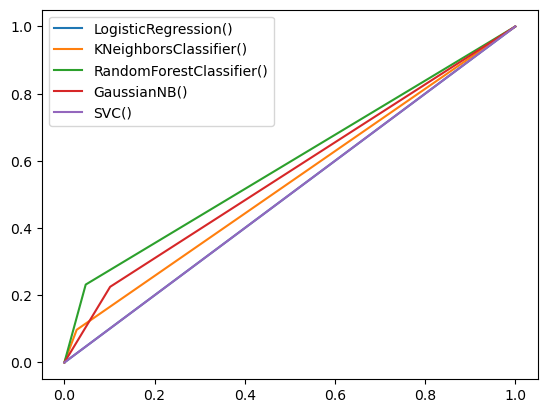

In [21]:
plt.figure(0).clf()
for name, model in models:
    print(name)
    name = model
    name.fit(X_train, Y_train)
    probs = name.predict(X_test)
    print(classification_report(Y_test, probs))
    auc = roc_auc_score(Y_test, probs)
    print('AUC: %.3f\n\n' % auc)
    fpr, tpr, _ = roc_curve(Y_test, probs)
    auc = round(roc_auc_score(Y_test, probs), 4)
    plt.plot(fpr,tpr,label=name)

plt.legend()    